In [1]:
import pandas as pd
encoding='latin1'
df = pd.read_csv("C:/Users/Owner/Desktop/AML 2203/brfss2013.csv",encoding=encoding, error_bad_lines=False)
print(df.head())

C:\Users\Owner\AppData\Local\Temp\ipykernel_20896\1045293479.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("C:/Users/Owner/Desktop/AML 2203/brfss2013.csv",encoding=encoding, error_bad_lines=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_20896\1045293479.py:3: DtypeWarning: Columns (12,15,51,54,103,104,105,106,109,112,113,114,119,120,121,122,123,124,126,127,128,131,133,135,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,189,191,192,193,194,195,196,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,217,227,228,229,230,231,313) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Owner/Desktop/AML 2203/brfss2013.csv",encoding=encoding, error_bad_lines=False)


   Unnamed: 0  X_state    fmonth      idate    imonth  iday   iyear  \
0           1  Alabama   January  1092013.0   January   9.0  2013.0   
1           2  Alabama   January  1192013.0   January  19.0  2013.0   
2           3  Alabama   January  1192013.0   January  19.0  2013.0   
3           4  Alabama   January  1112013.0   January  11.0  2013.0   
4           5  Alabama  February  2062013.0  February   6.0  2013.0   

              dispcode         seqno         X_psu  ...  \
0  Completed interview  2.013001e+09  2.013001e+09  ...   
1  Completed interview  2.013001e+09  2.013001e+09  ...   
2  Completed interview  2.013001e+09  2.013001e+09  ...   
3  Completed interview  2.013001e+09  2.013001e+09  ...   
4  Completed interview  2.013001e+09  2.013001e+09  ...   

                      X_pastae1  \
0  Did not meet both guidelines   
1  Did not meet both guidelines   
2  Did not meet both guidelines   
3  Did not meet both guidelines   
4  Did not meet both guidelines   

       

In [2]:
missing_values = df.isnull().sum()
print("Missing Values Count for Each Column:")
pd.set_option('display.max_rows', None)  # Display all rows
print(missing_values)
pd.reset_option('display.max_rows')  # Reset row display options

Missing Values Count for Each Column:
Unnamed: 0         0
X_state            0
fmonth             3
idate              2
imonth             3
iday               3
iyear              5
dispcode           5
seqno              3
X_psu              2
ctelenum          41
pvtresd1      131636
colghous      491730
stateres      131642
cellfon3      135151
ladult        491737
numadult      131651
nummen        131650
numwomen      131650
genhlth         1985
physhlth       10957
menthlth        8627
poorhlth      243153
hlthpln1        1904
persdoc2        1801
medcost         1221
checkup1        6305
sleptim1        7387
bphigh4         1420
bpmeds        293201
bloodcho        9010
cholchk        73178
toldhi2        71662
cvdinfr4        2587
cvdcrhd4        4423
cvdstrk3        1467
asthma3         1559
asthnow       426435
chcscncr        1309
chcocncr        1148
chccopd1        2724
havarth3        2970
addepev2        2289
chckidny        1721
diabete3         832
veteran3         

In [3]:
# Define a threshold for the maximum number of missing values
threshold = 250000

# Get the columns with missing values counts
missing_values = df.isnull().sum()

# Find columns with more than the specified threshold
columns_to_drop = missing_values[missing_values > threshold].index

# Drop the columns from the dataset
df = df.drop(columns=columns_to_drop)

# Now, data will contain only columns with fewer than 250,000 missing values.

In [4]:
df.shape

(491775, 191)

In [5]:
missing_values = df.isnull().sum()
print("Missing Values Count for Each Column:")
pd.set_option('display.max_rows', None)  # Display all rows
print(missing_values)
pd.reset_option('display.max_rows')  # Reset row display options

Missing Values Count for Each Column:
Unnamed: 0         0
X_state            0
fmonth             3
idate              2
imonth             3
iday               3
iyear              5
dispcode           5
seqno              3
X_psu              2
ctelenum          41
pvtresd1      131636
stateres      131642
cellfon3      135151
numadult      131651
nummen        131650
numwomen      131650
genhlth         1985
physhlth       10957
menthlth        8627
poorhlth      243153
hlthpln1        1904
persdoc2        1801
medcost         1221
checkup1        6305
sleptim1        7387
bphigh4         1420
bloodcho        9010
cholchk        73178
toldhi2        71662
cvdinfr4        2587
cvdcrhd4        4423
cvdstrk3        1467
asthma3         1559
chcscncr        1309
chcocncr        1148
chccopd1        2724
havarth3        2970
addepev2        2289
chckidny        1721
diabete3         832
veteran3         746
marital         3420
children        2274
educa           2274
employ1         3

In [6]:
# Filter and get the list of numerical columns
numerical_columns = df.select_dtypes(include=[float, int]).columns.tolist()

# Replace missing values in numerical columns with their mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Replace missing values in categorical columns with their mode
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [7]:
missing_values = df.isnull().sum()
print("Missing Values Count for Each Column:")
pd.set_option('display.max_rows', None)  # Display all rows
print(missing_values)
pd.reset_option('display.max_rows')  # Reset row display options

Missing Values Count for Each Column:
Unnamed: 0    0
X_state       0
fmonth        0
idate         0
imonth        0
iday          0
iyear         0
dispcode      0
seqno         0
X_psu         0
ctelenum      0
pvtresd1      0
stateres      0
cellfon3      0
numadult      0
nummen        0
numwomen      0
genhlth       0
physhlth      0
menthlth      0
poorhlth      0
hlthpln1      0
persdoc2      0
medcost       0
checkup1      0
sleptim1      0
bphigh4       0
bloodcho      0
cholchk       0
toldhi2       0
cvdinfr4      0
cvdcrhd4      0
cvdstrk3      0
asthma3       0
chcscncr      0
chcocncr      0
chccopd1      0
havarth3      0
addepev2      0
chckidny      0
diabete3      0
veteran3      0
marital       0
children      0
educa         0
employ1       0
income2       0
weight2       0
height3       0
numhhol2      0
cpdemo1       0
cpdemo4       0
internet      0
renthom1      0
sex           0
qlactlm2      0
useequip      0
blind         0
decide        0
diffwalk      0
di

In [8]:
df = df.drop(df.columns[0], axis=1)

In [9]:
df

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastrng,X_parec1,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_aidtst3,X_age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,60.000000
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,50.000000
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,Yes,55.000000
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,64.000000
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491770,Puerto Rico,June,6212013.0,June,21.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and no limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,58.000000
491771,Puerto Rico,June,6222013.0,June,22.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities not ...,Always or almost always wear seat belt,Always wear seat belt,No,62.000000
491772,Puerto Rico,July,8062013.0,August,6.0,2013.0,Partially completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,37.000000
491773,Puerto Rico,July,8052013.0,August,5.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Met aerobic guidelines only,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,30.000000


In [10]:
# removing duplicate rows
df = df.drop_duplicates()


In [11]:
# Create a mapping for the column names
column_mapping = {
    'X_state': 'State',
    'fmonth': 'FMonth',
    'idate': 'IDate',
    'imonth': 'IMonth',
    'iday': 'IDay',
    'iyear': 'IYear',
    'dispcode': 'DispCode',
    'seqno': 'SeqNo',
    'X_psu': 'PSU',
    'ctelenum': 'CTelenum',
    'pvtresd1': 'PvtResd1',
    'stateres': 'StateRes',
    'cellfon3': 'CellPhone',
    'ladult': 'LAdult',
    'numadult': 'NumAdult',
    'nummen': 'NumMen',
    'numwomen': 'NumWomen',
    'genhlth': 'GenHealth',
    'physhlth': 'PhysicalHealth',
    'menthlth': 'MentalHealth',
    'poorhlth': 'PoorHealth',
    'hlthpln1': 'HealthPlan1',
    'persdoc2': 'PersonalDoc2',
    'medcost': 'MedCost',
    'checkup1': 'Checkup1',
    'sleptim1': 'SleepTime1',
    'bphigh4': 'BloodPressureHigh4',
    'bpmeds': 'BloodPressureMeds',
    'bloodcho': 'BloodCholesterol',
    'cholchk': 'CholesterolCheck',
    'toldhi2': 'ToldHighBloodPressure2',
    'cvdinfr4': 'CVDInfarction4',
    'cvdcrhd4': 'CVDCoronaryHeartDisease4',
    'cvdstrk3': 'CVDStroke3',
    'asthma3': 'Asthma3',
    'asthnow': 'AsthmaNow',
    'chcscncr': 'ChronicCancer',
    'chcocncr': 'ColorectalCancer',
    'chccopd1': 'ChronicCOPD1',
    'havarth3': 'HaveArthritis3',
    'addepev2': 'AdDepressionEver2',
    'chckidny': 'CheckKidney',
    'diabete3': 'Diabetes3',
    'veteran3': 'Veteran3',
    'marital': 'MaritalStatus',
    'children': 'Children',
    'educa': 'Education',
    'employ1': 'Employment1',
    'income2': 'Income2',
    'weight2': 'Weight2',
    'height3': 'Height3',
    'numhhol2': 'NumHHold2',
    'numphon2': 'NumPhone2',
    'cpdemo1': 'CPDemo1',
    'cpdemo4': 'CPDemo4',
    'internet': 'Internet',
    'renthom1': 'RentHome1',
    'sex': 'Sex',
    'pregnant': 'Pregnant',
    'qlactlm2': 'QLactlm2',
    'useequip': 'UseEquip',
    'blind': 'Blind',
    'decide': 'Decide',
    'diffwalk': 'DiffWalk',
    'diffdres': 'DiffDress',
    'diffalon': 'DiffAlon',
    'smoke100': 'Smoke100',
    'smokday2': 'SmokeDay2',
    'stopsmk2': 'StopSmk2',
    'lastsmk2': 'LastSmk2',
    'usenow3': 'UseNow3',
    'alcday5': 'AlcDay5',
    'avedrnk2': 'AveDrnk2',
    'drnk3ge5': 'Drnk3ge5',
    'maxdrnks': 'MaxDrnks',
    'fruitju1': 'FruitJu1',
    'fruit1': 'Fruit1',
    'fvbeans': 'FVBeans',
    'fvgreen': 'FVGreen',
    'fvorang': 'FVOrange',
    'vegetab1': 'Vegetab1',
    'exerany2': 'ExerAny2',
    'exract11': 'ExrAct11',
    'exeroft1': 'ExerOft1',
    'exerhmm1': 'ExerHmm1',
    'exract21': 'ExrAct21',
    'exeroft2': 'ExerOft2',
    'exerhmm2': 'ExerHmm2',
    'strength': 'Strength',
    'lmtjoin3': 'LmtJoin3',
    'arthdis2': 'ArthDis2',
    'arthsocl': 'ArthSocl',
    'joinpain': 'JoinPain',
    'seatbelt': 'SeatBelt',
    'flushot6': 'FluShot6',
    'flshtmy2': 'FluShotMy2',
    'tetanus': 'Tetanus',
    'pneuvac3': 'PneuVac3',
    'hivtst6': 'HIVTest6',
    'hivtstd3': 'HIVTested3',
    'whrtst10': 'WhrTest10',
    'pdiabtst': 'PDiabTest',
    'prediab1': 'PreDiab1',
    'diabage2': 'DiabAge2',
    'insulin': 'Insulin',
    'bldsugar': 'BldSugar',
    'feetchk2': 'FeetChk2',
    'doctdiab': 'DoctDiab',
    'chkhemo3': 'ChkHemo3',
    'feetchk': 'FeetChk',
    'eyeexam': 'EyeExam',
    'diabeye': 'DiabEye',
    'diabedu': 'DiabEdu',
    'painact2': 'PainAct2',
    'qlmentl2': 'QLMentl2',
    'qlstres2': 'QLStres2',
    'qlhlth2': 'QLHealth2',
    'medicare': 'Medicare',
    'hlthcvrg': 'HealthCoverage',
    'delaymed': 'DelayMed',
    'dlyother': 'DlyOther',
    'nocov121': 'NoCov121',
    'lstcovrg': 'LstCovrg',
    'drvisits': 'DrVisits',
    'medscost': 'MedCost',
    'carercvd': 'CarerCVD',
    'medbills': 'MedBills',
    'ssbsugar': 'SSBSugar',
    'ssbfrut2': 'SSBFruit2',
    'wtchsalt': 'WtchSalt',
    'longwtch': 'LongWtch',
    'dradvise': 'DrAdvise',
    'asthmage': 'AsthmaAge',
    'asattack': 'AsAttack',
    'aservist': 'Aservist',
    'asdrvist': 'AsDrvist',
    'asrchkup': 'AsRChkup',
    'asactlim': 'AsActLim',
    'asymptom': 'Asymptom',
    'asnoslep': 'AsNoSlep',
    'asthmed3': 'AsthMed3',
    'asinhalr': 'AsInhalr',
    'harehab1': 'HaRehab1',
    'strehab1': 'StRehab1',
    'cvdasprn': 'CVDAsprn',
    'aspunsaf': 'AsPunSafe',
    'rlivpain': 'RLivPain',
    'rduchart': 'RduChart',
    'rducstrk': 'RduCstrk',
    'arttoday': 'ArtToday',
    'arthwgt': 'ArthWgt',
    'arthexer': 'ArthExer',
    'arthedu': 'ArthEdu',
    'imfvplac': 'IMFVPlac',
    'hpvadvc2': 'HPVAdvc2',
    'hpvadsht': 'HPVAdSht',
    'hadmam': 'HadMam',
    'howlong': 'HowLong',
    'profexam': 'ProfExam',
    'lengexam': 'LengExam',
    'hadpap2': 'HadPap2',
    'lastpap2': 'LastPap2',
    'hadhyst2': 'HadHyst2',
    'bldstool': 'BldStool',
    'lstblds3': 'LstBldS3',
    'hadsigm3': 'HadSigm3',
    'hadsgco1': 'HadSGco1',
        'lastsig3': 'LastSig3',
    'pcpsaad2': 'PCPSaad2',
    'pcpsadi1': 'PCPSadi1',
    'pcpsare1': 'PCPSare1',
    'psatest1': 'PSATest1',
    'psatime': 'PSATime',
    'pcpsars1': 'PCPSars1',
    'pcpsade1': 'PCPSade1',
    'pcdmdecn': 'PCDMDecn',
    'rrclass2': 'RRClass2',
    'rrcognt2': 'RRCognt2',
    'rratwrk2': 'RratWrk2',
    'rrhcare3': 'RRHcare3',
    'rrphysm2': 'RRPhysm2',
    'rremtsm2': 'RremTsm2',
    'misnervs': 'MisNervs',
    'mishopls': 'MIShopls',
    'misrstls': 'MisRstls',
    'misdeprd': 'MisDeprd',
    'miseffrt': 'MisEffrt',
    'miswtles': 'MisWtles',
    'misnowrk': 'MisNowrk',
    'mistmnt': 'MisTmnt',
    'mistrhlp': 'MisTrhlp',
    'misphlpf': 'MisPhlpf',
    'scntmony': 'SCntMony',
    'scntmeal': 'SCntMeal',
    'scntpaid': 'SCntPaid',
    'scntwrk1': 'SCntWrk1',
    'scntlpad': 'SCntLpad',
    'scntlwk1': 'SCntLwk1',
    'scntvot1': 'SCntVot1',
    'rcsgendr': 'RCSGendr',
    'rcsrltn2': 'RCSrltn2',
    'casthdx2': 'CasthDx2',
    'casthno2': 'CasthNo2',
    'emtsuprt': 'EMTsuprt',
    'lsatisfy': 'LSatisfy',
    'ctelnum1': 'CTelNum1',
    'cellfon2': 'CellFon2',
    'cadult': 'CAdult',
    'pvtresd2': 'PvtResd2',
    'cclghous': 'CClgHous',
    'cstate': 'CState',
    'landline': 'Landline',
    'pctcell': 'PctCell',
    'qstver': 'QstVer',
    'qstlang': 'QstLang',
    'mscode': 'MSCode',
    'X_ststr': 'X_StStr',
    'X_strwt': 'X_StrWt',
    'X_rawrake': 'X_RawRake',
    'X_wt2rake': 'X_Wt2Rake',
    'X_imprace': 'X_ImpRace',
    'X_impnph': 'X_ImpNph',
    'X_dualuse': 'X_DualUse',
    'X_llcpwt2': 'X_LLCPWt2',
    'X_llcpwt': 'X_LLCPWt',
    'X_rfhlth': 'X_RFHLth',
    'X_hcvu651': 'X_HCVu651',
    'X_rfhype5': 'X_RFHype5',
    'X_cholchk': 'X_CholChk',
    'X_rfchol': 'X_RFChol',
    'X_ltasth1': 'X_LtAsth1',
    'X_casthm1': 'X_Casthm1',
    'X_asthms1': 'X_Asthms1',
    'X_drdxar1': 'X_DrDxAr1',
    'X_prace1': 'X_PRace1',
    'X_mrace1': 'X_MRace1',
    'X_hispanc': 'X_Hispanc',
    'X_race': 'X_Race',
    'X_raceg21': 'X_RaceG21',
    'X_racegr3': 'X_RaceGr3',
        'X_race_g1': 'X_RaceG1',
    'X_ageg5yr': 'X_AgeG5yr',
    'X_age65yr': 'X_Age65yr',
    'X_age_g': 'X_AgeG',
    'htin4': 'HTin4',
    'htm4': 'HTm4',
    'wtkg3': 'WtKg3',
    'X_bmi5': 'X_BMI5',
    'X_bmi5cat': 'X_BMI5Cat',
    'X_rfbmi5': 'X_RFBMI5',
    'X_chldcnt': 'X_ChldCnt',
    'X_educag': 'X_EducAg',
    'X_incomg': 'X_IncomG',
    'X_smoker3': 'X_Smoker3',
    'X_rfsmok3': 'X_RFSmok3',
    'drnkany5': 'DrnkAny5',
    'drocdy3_': 'Drocdy3_',
    'X_rfbing5': 'X_RFBing5',
    'X_drnkdy4': 'X_DrnkDy4',
    'X_drnkmo4': 'X_DrnkMo4',
    'X_rfdrhv4': 'X_RFDrHv4',
    'X_rfdrwm4': 'X_RFDrWm4',
    'ftjuda1_': 'FtJuda1_',
    'frutda1_': 'FrutDa1_',
    'beanday_': 'BeanDay_',
    'grenday_': 'GreenDay_',
    'orngday_': 'OrngDay_',
    'vegeda1_': 'Vegeda1_',
    'X_misfrtn': 'X_MisFrtn',
    'X_misvegn': 'X_MisVegn',
    'X_frtresp': 'X_FrtResp',
    'X_vegresp': 'X_VegResp',
    'X_frutsum': 'X_FrutSum',
    'X_vegesum': 'X_VegSum',
    'X_frtlt1': 'X_FrtLt1',
    'X_veglt1': 'X_VegLt1',
    'X_frt16': 'X_Frt16',
    'X_veg23': 'X_Veg23',
    'X_fruitex': 'X_FruitEx',
    'X_vegetex': 'X_VegetEx',
    'X_totinda': 'X_TotInda',
    'metvl11_': 'Metvl11_',
    'metvl21_': 'Metvl21_',
    'maxvo2_': 'MaxVo2_',
    'fc60_': 'Fc60_',
    'actin11_': 'Actin11_',
    'actin21_': 'Actin21_',
    'padur1_': 'Padur1_',
    'pafreq1_': 'Pafreq1_',
    'X_minac11': 'X_MinAc11',
    'X_minac21': 'X_MinAc21',
    'strfreq_': 'StrFreq_',
    'pamiss1_': 'Pamiss1_',
    'pamin11_': 'Pamin11_',
    'pamin21_': 'Pamin21_',
    'pa1min_': 'Pa1min_',
    'pavig11_': 'Pavig11_',
    'pavig21_': 'Pavig21_',
    'pa1vigm_': 'Pa1vigm_',
    'X_pacat1': 'X_PaCat1',
    'X_paindx1': 'X_PainDx1',
    'X_pa150r2': 'X_Pa150R2',
    'X_pa300r2': 'X_Pa300R2',
    'X_pa30021': 'X_Pa30021',
    'X_pastrng': 'X_PaStrng',
    'X_parec1': 'X_PaRec1',
    'X_pastae1': 'X_PaStae1',
    'X_lmtact1': 'X_LmtAct1',
    'X_lmtwrk1': 'X_LmtWrk1',
    'X_lmtscl1': 'X_LmtScl1',
    'X_rfseat2': 'X_RFSeat2',
    'X_rfseat3': 'X_RFSeat3',
    'X_aidtst3': 'X_AidTst3',
    'X_age80': 'X_Age80',
}

# Rename the first 50 columns
df.rename(columns=column_mapping, inplace=True)


C:\Users\Owner\AppData\Local\Temp\ipykernel_20896\1007674896.py:320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)


In [12]:
df

,State,FMonth,IDate,IMonth,IDay,IYear,DispCode,SeqNo,PSU,CTelenum,...,X_PaStrng,X_PaRec1,X_PaStae1,X_LmtAct1,X_LmtWrk1,X_LmtScl1,X_RFSeat2,X_RFSeat3,X_AidTst3,X_Age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,60.000000
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,50.000000
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,Yes,55.000000
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,64.000000
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491770,Puerto Rico,June,6212013.0,June,21.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and no limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,58.000000
491771,Puerto Rico,June,6222013.0,June,22.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities not ...,Always or almost always wear seat belt,Always wear seat belt,No,62.000000
491772,Puerto Rico,July,8062013.0,August,6.0,2013.0,Partially completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,37.000000
491773,Puerto Rico,July,8052013.0,August,5.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Met aerobic guidelines only,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,30.000000


In [13]:
# removing unwanted prefix and sufix from column names
df.columns = df.columns.str.replace('X_', '').str.rstrip('_')


In [14]:
df

,State,FMonth,IDate,IMonth,IDay,IYear,DispCode,SeqNo,PSU,CTelenum,...,PaStrng,PaRec1,PaStae1,LmtAct1,LmtWrk1,LmtScl1,RFSeat2,RFSeat3,AidTst3,Age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,60.000000
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,50.000000
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,Yes,55.000000
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,64.000000
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,66.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491770,Puerto Rico,June,6212013.0,June,21.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and no limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,No,58.000000
491771,Puerto Rico,June,6222013.0,June,22.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities not ...,Always or almost always wear seat belt,Always wear seat belt,No,62.000000
491772,Puerto Rico,July,8062013.0,August,6.0,2013.0,Partially completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Did not meet either guideline,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,37.000000
491773,Puerto Rico,July,8052013.0,August,5.0,2013.0,Completed interview,2.013005e+09,2.013005e+09,Yes,...,Did not meet muscle strengthening recommendations,Met aerobic guidelines only,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,Yes,30.000000


In [15]:
# Convert Index to a list
column_names_list = list(df.columns)
print(column_names_list)

['State', 'FMonth', 'IDate', 'IMonth', 'IDay', 'IYear', 'DispCode', 'SeqNo', 'PSU', 'CTelenum', 'PvtResd1', 'StateRes', 'CellPhone', 'NumAdult', 'NumMen', 'NumWomen', 'GenHealth', 'PhysicalHealth', 'MentalHealth', 'PoorHealth', 'HealthPlan1', 'PersonalDoc2', 'MedCost', 'Checkup1', 'SleepTime1', 'BloodPressureHigh4', 'BloodCholesterol', 'CholesterolCheck', 'ToldHighBloodPressure2', 'CVDInfarction4', 'CVDCoronaryHeartDisease4', 'CVDStroke3', 'Asthma3', 'ChronicCancer', 'ColorectalCancer', 'ChronicCOPD1', 'HaveArthritis3', 'AdDepressionEver2', 'CheckKidney', 'Diabetes3', 'Veteran3', 'MaritalStatus', 'Children', 'Education', 'Employment1', 'Income2', 'Weight2', 'Height3', 'NumHHold2', 'CPDemo1', 'CPDemo4', 'Internet', 'RentHome1', 'Sex', 'QLactlm2', 'UseEquip', 'Blind', 'Decide', 'DiffWalk', 'DiffDress', 'DiffAlon', 'Smoke100', 'UseNow3', 'AlcDay5', 'FruitJu1', 'Fruit1', 'FVBeans', 'FVGreen', 'FVOrange', 'Vegetab1', 'ExerAny2', 'ExrAct11', 'ExerOft1', 'ExerHmm1', 'ExrAct21', 'Strength', 'S

In [16]:
#pip install geopandas

In [17]:
#import geopandas as gpd

# Download the GeoJSON file for U.S. states from Natural Earth
#geojson_url = 'https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_20m.zip'

# Read the GeoDataFrame from the GeoJSON file
#gdf_states = gpd.read_file(geojson_url)

# Display the GeoDataFrame
#print(gdf_states.head())


# 1. Identifying Prevalence of Major Health Risk Factors

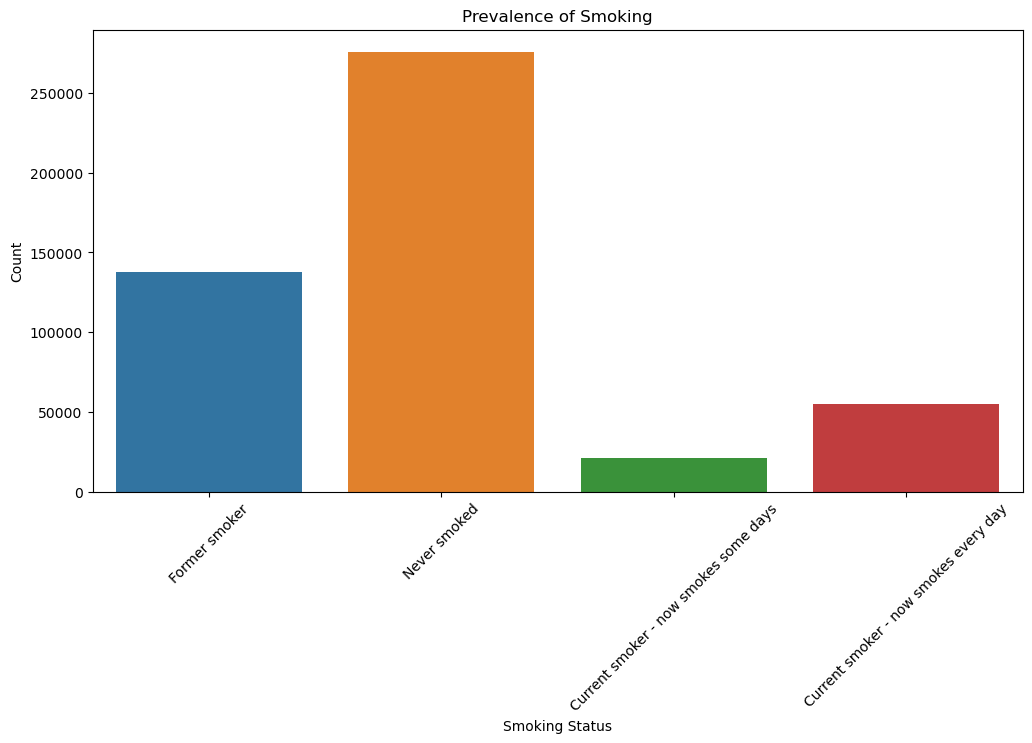

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# A.Smoking
plt.figure(figsize=(12, 6))
sns.countplot(x='Smoker3', data=df)  
plt.title('Prevalence of Smoking')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Prevalence_Smoking')

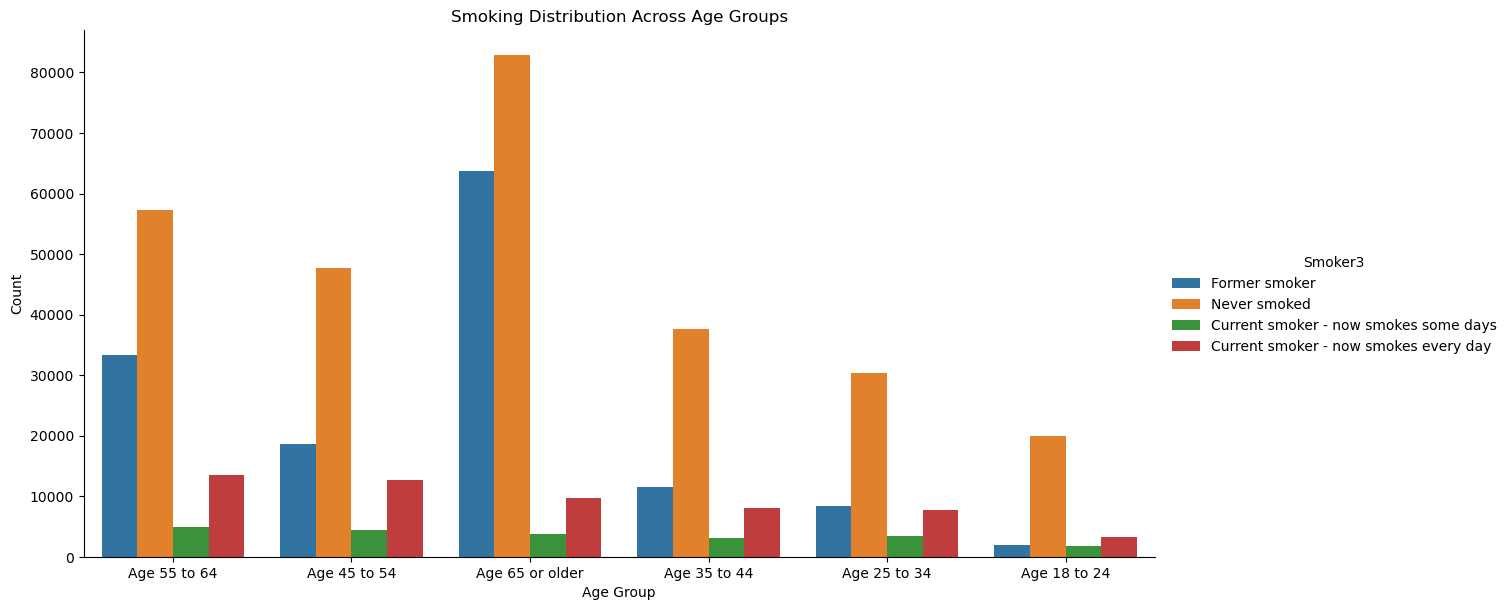

<Figure size 640x480 with 0 Axes>

In [19]:
sns.catplot(x='AgeG', hue='Smoker3', data=df, kind='count', height=6, aspect=2)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Smoking Distribution Across Age Groups')
plt.show()
plt.savefig('Prevalence_Smoking2')


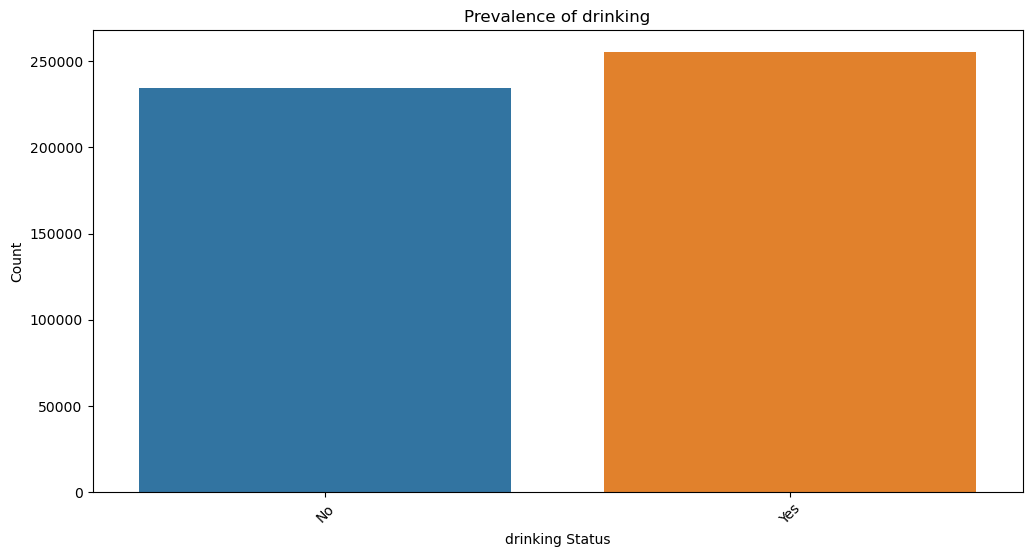

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#B.Drinking
plt.figure(figsize=(12, 6))
sns.countplot(x='DrnkAny5', data=df)  
plt.title('Prevalence of drinking')
plt.xlabel('drinking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Prevalence_Drinking')

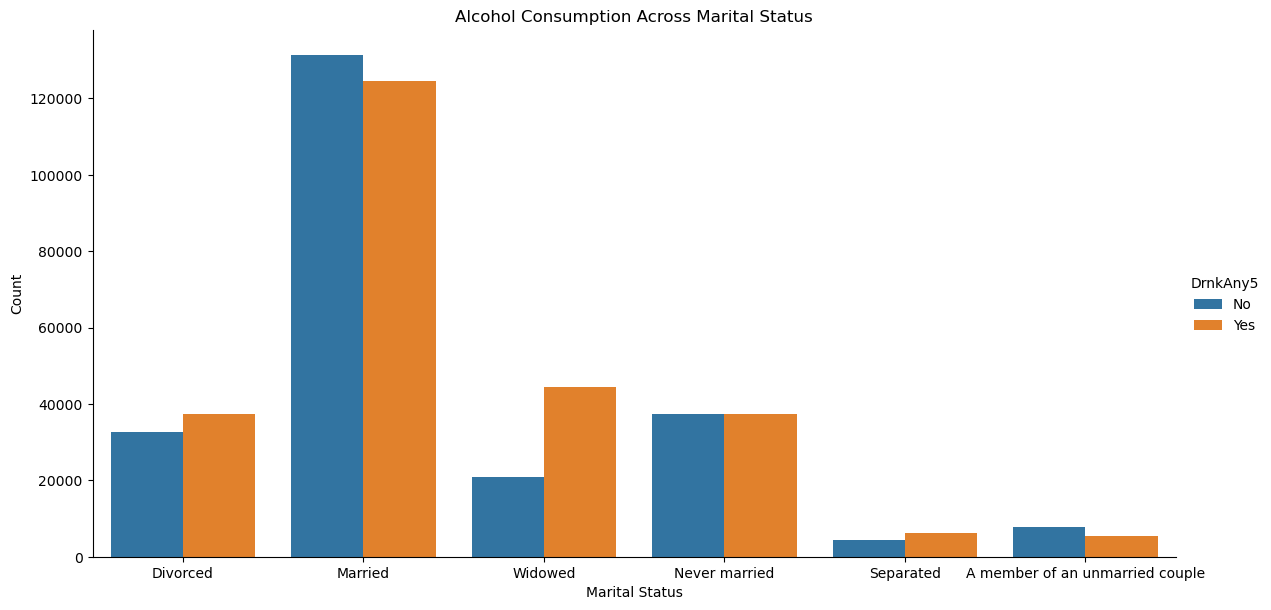

<Figure size 640x480 with 0 Axes>

In [21]:
sns.catplot(x='MaritalStatus', hue='DrnkAny5', data=df, kind='count', height=6, aspect=2)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Alcohol Consumption Across Marital Status')
plt.show()
plt.savefig('Prevalence_Drinking2')

# 2.Correlation of Lifestyle Factors

C:\Users\Owner\AppData\Local\Temp\ipykernel_20896\3369055656.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


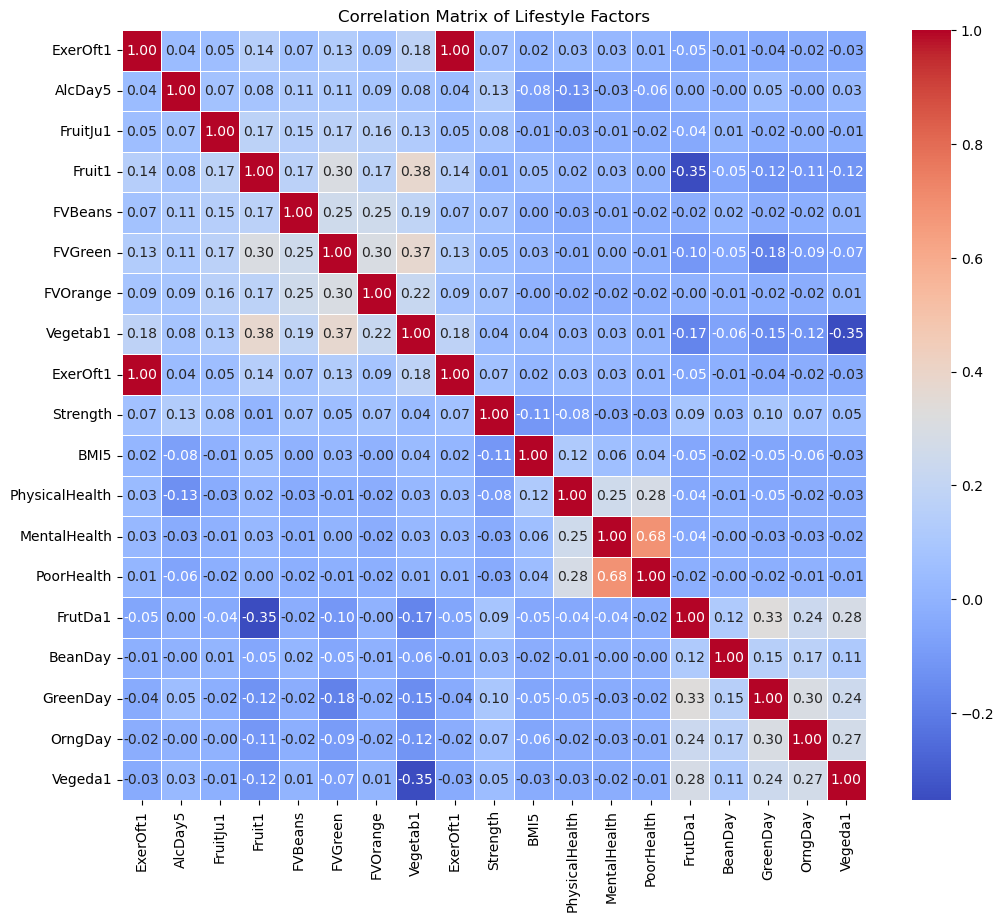

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of interest
selected_columns =['UseNow3','ExerAny2','ExrAct11','ExerOft1','Medicare','AlcDay5', 'FruitJu1', 'Fruit1','FVBeans','FVGreen','FVOrange','Vegetab1','ExerOft1','Strength','BMI5',
    'PhysicalHealth','MentalHealth','PoorHealth','Smoker3','RFSmok3','DrnkAny5','FrutDa1','BeanDay','GreenDay','OrngDay',
    'Vegeda1','MisFrtn','MisVegn','FrtResp','VegResp','FrtLt1','VegLt1','Veg23','FruitEx','VegetEx']
# Create a DataFrame with selected columns
selected_df = df[selected_columns]
# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Lifestyle Factors')
plt.show()
plt.savefig('CRM')

# 3.Impact of Education on Physical Health

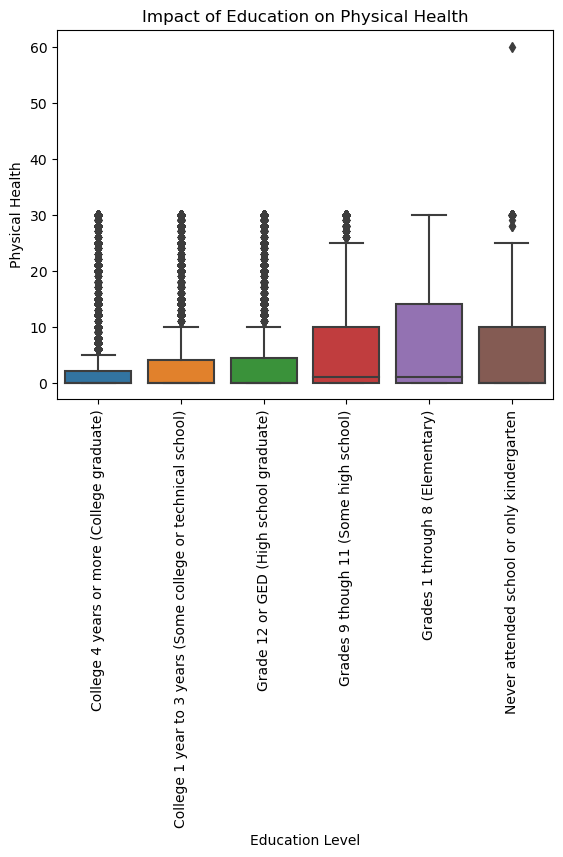

<Figure size 640x480 with 0 Axes>

In [23]:
sns.boxplot(x='Education', y='PhysicalHealth', data=df)
plt.xlabel('Education Level')
plt.ylabel('Physical Health')
plt.title('Impact of Education on Physical Health')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Impact_E')

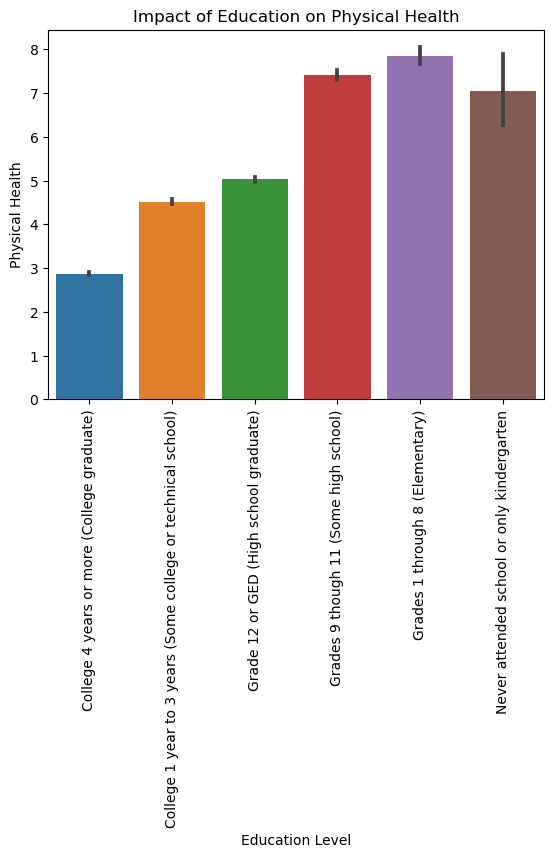

<Figure size 640x480 with 0 Axes>

In [24]:
sns.barplot(x='Education', y='PhysicalHealth', data=df)
plt.xlabel('Education Level')
plt.ylabel('Physical Health')
plt.title('Impact of Education on Physical Health')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Impact_E1')

# 4.Impact of Occupation on Physical Health

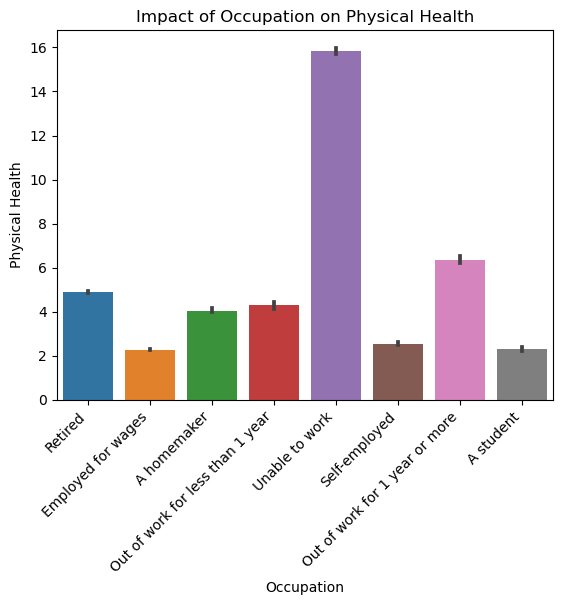

<Figure size 640x480 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.barplot(x='Employment1', y='PhysicalHealth', data=df)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Physical Health')
plt.title('Impact of Occupation on Physical Health')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
plt.savefig('Impact_O')

# 5.Comparison of Physical Health across genders

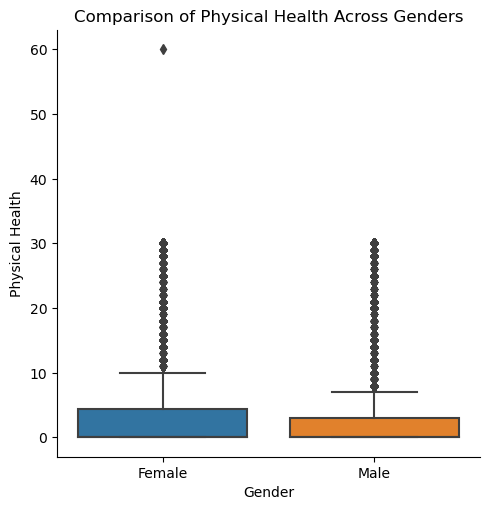

<Figure size 640x480 with 0 Axes>

In [26]:
sns.catplot(x='Sex', y='PhysicalHealth', data=df, kind='box')
plt.xlabel('Gender')
plt.ylabel('Physical Health')
plt.title('Comparison of Physical Health Across Genders')
plt.show()
plt.savefig('Impact_g')